In [1]:
import pandas as pd

df = pd.read_parquet(r"C:\Users\Lavanya\Desktop\AI-Phishing-\datasets\raw\meajor_cleaned_preprocessed.parquet.gzip")
print(f"✅ Loaded {len(df)} rows, {len(df.columns)} columns")
df.head()

✅ Loaded 108685 rows, 20 columns


,sender,sender_domain,receiver,receiver_domain,date,subject,content_types,body,urls,url_count,url_length_max,url_length_avg,url_subdom_max,url_subdom_avg,attachment_count,has_attachments,attachment_types,language,source,label
0,d66e9e64b006d6bca649f1c945129c42c43836872b2ead...,enron.com,35c5a9fb9fba3b8737ed7cef2a87e427a73db4fca85f6b...,enron.com,2001-06-29 09:37:04-05:00,[ORGANIZATION] failover plan.,text/plain,"Hi [NAME], \n\nTonight we are rolling out a n...",None,0.0,0.0,0.0,0.0,0.0,0.0,False,None,en,trec5,0.0
1,0907d5c64598aa2639154ed4e1556be615669e40052a1f...,enron.com,aa2c35499eae5999bf6080453cc719a891da2bb0c3803d...,enron.com,2001-06-29 08:39:30-05:00,RE: Intranet Site,text/plain,"[NAME] r these new?\tIntranet Site\n\n[NAME],\...",http://eastpower.dev.corp.enron.com/summary/pj...,3.0,60.0,58.0,3.0,3.0,0.0,False,None,en,trec5,0.0
2,7c3201a5ff8c5985218f1e3f11e330dc0242bbd28c6c20...,enron.com,a736837579feb601fbf6c0657d3d93689774afa6491bb9...,enron.com;enron.com,2001-06-29 10:35:17-05:00,FW: [ORGANIZATION] Company information,text/plain,"[NAME]/[NAME],\n\nWe are currently trading und...",None,0.0,0.0,0.0,0.0,0.0,0.0,False,None,en,trec5,0.0
3,8531d54a169c4af106b9ea2165d4986b8cc10fc0a6bb9b...,enron.com,765a3ec4a67e40118d22de5729b05d090a1b59cb443bf6...,enron.com;enron.com,2001-06-29 10:40:02-05:00,New Master Physical,text/plain,[NAME] and [NAME] -\n\nAttached is a worksheet...,None,0.0,0.0,0.0,0.0,0.0,0.0,False,None,en,trec5,0.0
4,7c3201a5ff8c5985218f1e3f11e330dc0242bbd28c6c20...,enron.com,ce418c97ac415706338972e1dbbd99ebb8c617b5c937a3...,enron.com;enron.com;enron.com,2001-06-29 10:48:00-05:00,FW: [ORGANIZATION]/Mirant GISB,text/plain,FYI. Below is a copy of my communication with ...,None,0.0,0.0,0.0,0.0,0.0,0.0,False,None,en,trec5,0.0


In [3]:

print("Columns:", df.columns.tolist())
print("\nLabel distribution:\n", df['label'].value_counts())
print("\nMissing values:\n", df.isnull().sum().sort_values(ascending=False).head(10))

Columns: ['sender', 'sender_domain', 'receiver', 'receiver_domain', 'date', 'subject', 'content_types', 'body', 'urls', 'url_count', 'url_length_max', 'url_length_avg', 'url_subdom_max', 'url_subdom_avg', 'attachment_count', 'has_attachments', 'attachment_types', 'language', 'source', 'label']

Label distribution:
 label
0.0    60650
1.0    48034
Name: count, dtype: int64

Missing values:
 attachment_types    107019
urls                 44633
receiver_domain       2371
subject               1455
sender_domain          494
language                 1
source                   1
body                     1
label                    1
content_types            1
dtype: int64


In [5]:

before = len(df)
df = df.dropna(subset=['label']).copy()
after = len(df)
print(f"Dropped {before - after} rows with missing label.")

df['text'] = df['subject'].fillna('') + ' ' + df['body'].fillna('')
df['text'] = df['text'].str.strip()

before_text = len(df)
df = df[df['text'] != ''].copy()
after_text = len(df)
print(f"Dropped {before_text - after_text} rows with empty text.")

numeric_cols = ['url_count', 'url_length_max', 'url_length_avg',
                'url_subdom_max', 'url_subdom_avg', 'attachment_count']
df[numeric_cols] = df[numeric_cols].fillna(0)
df['label'] = df['label'].astype(int)

print("✅ Label dtype:", df['label'].dtype)

Dropped 1 rows with missing label.
Dropped 0 rows with empty text.
✅ Label dtype: int64


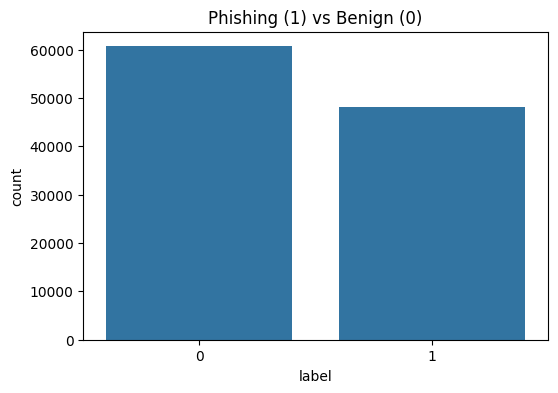

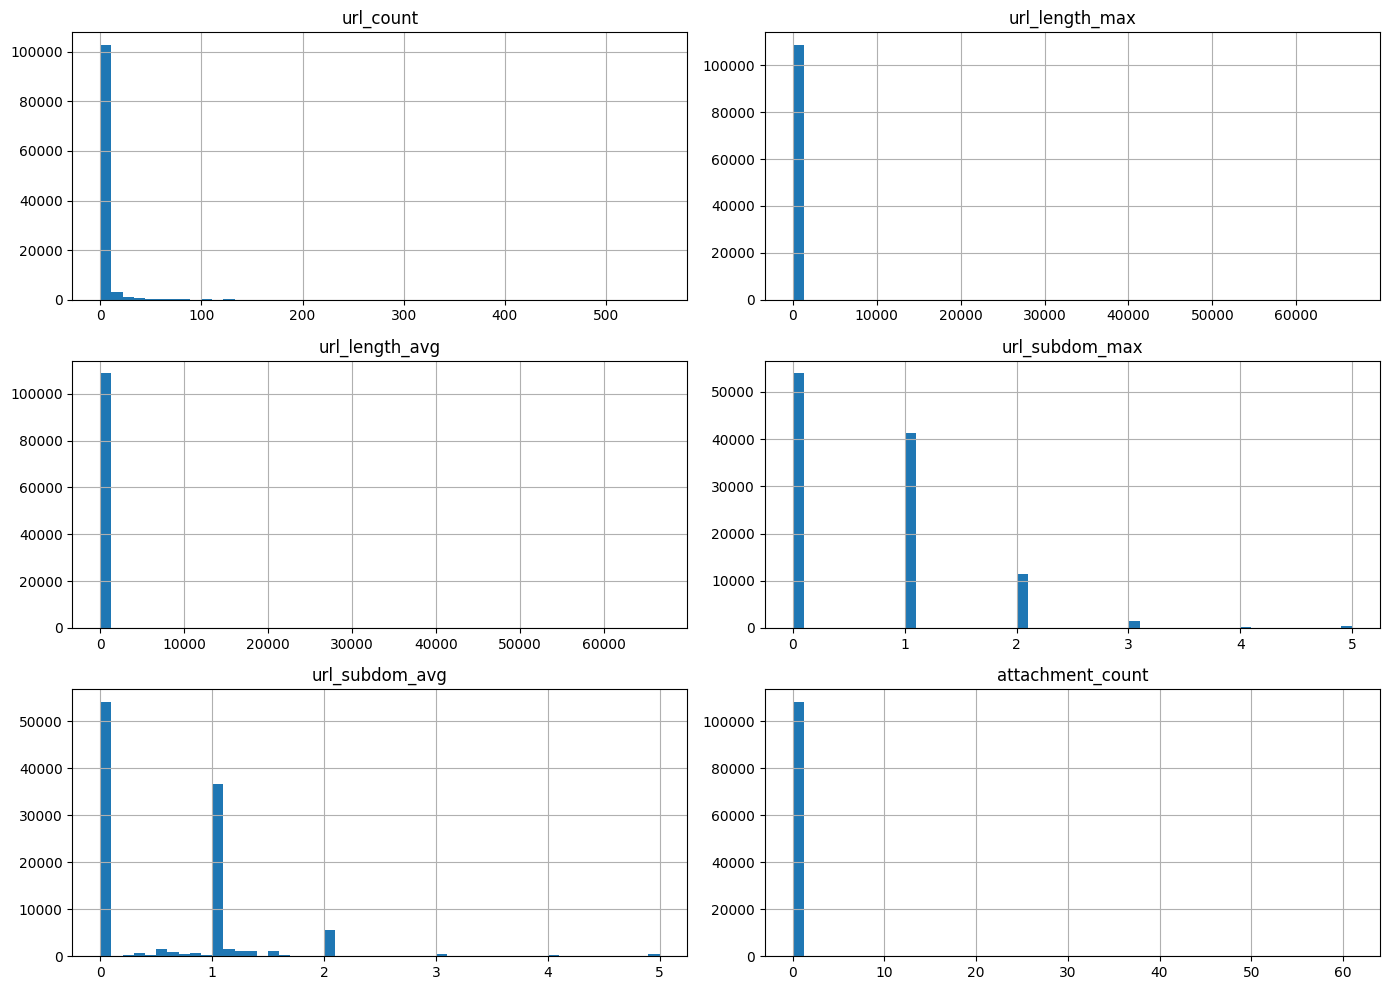

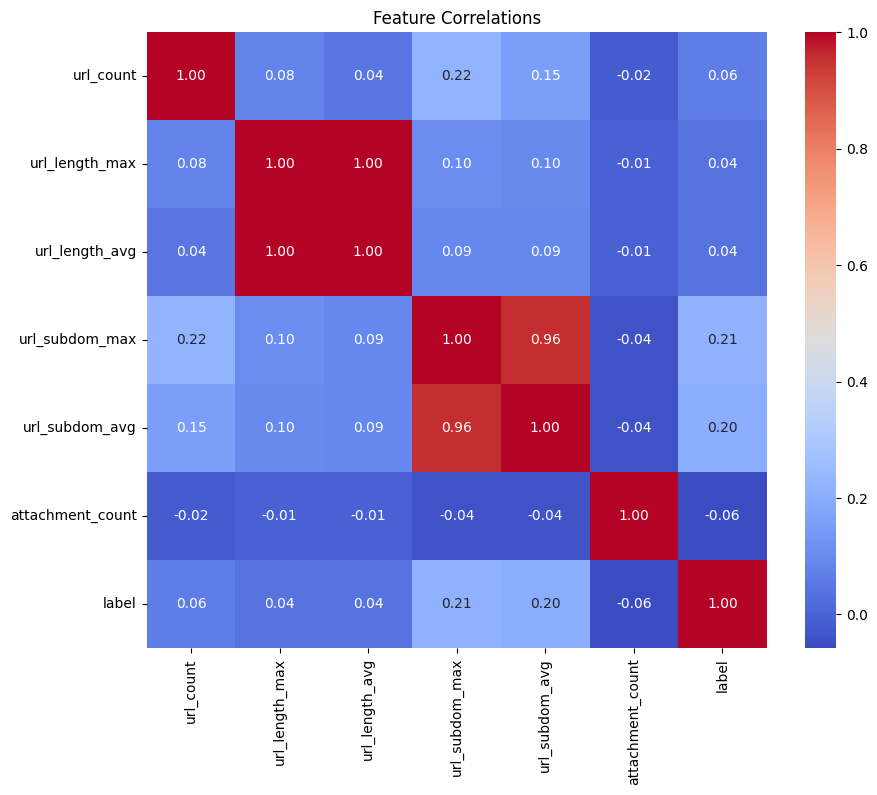

✅ EDA complete. Observe the plots.


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df)
plt.title('Phishing (1) vs Benign (0)')
plt.show()
numeric_cols = ['url_count', 'url_length_max', 'url_length_avg',
                'url_subdom_max', 'url_subdom_avg', 'attachment_count']
df[numeric_cols].hist(bins=50, figsize=(14,10))
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(df[numeric_cols + ['label']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlations')
plt.show()

print("✅ EDA complete. Observe the plots.")

In [7]:
from sklearn.model_selection import train_test_split

feature_cols = ['url_count', 'url_length_max', 
                'url_subdom_max', 'attachment_count']  
X = df[feature_cols].copy()
y = df['label'].copy()
texts = df['text'].copy()

X_train, X_temp, y_train, y_temp, texts_train, texts_temp = train_test_split(
    X, y, texts, test_size=0.2, stratify=y, random_state=42
)

X_val, X_test, y_val, y_test, texts_val, texts_test = train_test_split(
    X_temp, y_temp, texts_temp, test_size=0.5, stratify=y_temp, random_state=42
)

print(f"🔹 Train: {len(X_train)} | Val: {len(X_val)} | Test: {len(X_test)}")
print(f"🔹 Phishing ratio in train: {y_train.mean():.2%}")

🔹 Train: 86947 | Val: 10868 | Test: 10869
🔹 Phishing ratio in train: 44.20%


In [10]:
import joblib

train_idx = X_train.index
val_idx   = X_val.index
test_idx  = X_test.index

joblib.dump(train_idx, r"C:\Users\Lavanya\Desktop\AI-Phishing-\datasets\processed\train_idx.pkl")
joblib.dump(val_idx,   r"C:\Users\Lavanya\Desktop\AI-Phishing-\datasets\processed\val_idx.pkl")
joblib.dump(test_idx,  r"C:\Users\Lavanya\Desktop\AI-Phishing-\datasets\processed\test_idx.pkl")

df.to_parquet(r"C:\Users\Lavanya\Desktop\AI-Phishing-\datasets\processed\df_clean.parquet.gzip", compression='gzip')

print("✅ Processed data and indices saved to data/processed/")

✅ Processed data and indices saved to data/processed/
